<a href="https://colab.research.google.com/github/jd2504/bme_dsp_2025/blob/main/joel_deerwester_hw04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Homework: Poles location and Impulse response

Plot the impulse response for filters with the following configuration
of poles (see below figure for definition of quadrants)
1. TWO conjugate poles, one in quadrant I and the conjugate in quadrant IV.
2. TWO conjugate poles, one in quadrant II and the conjugate in quadrant III.
3. ONE pole in quadrant I.
4. TWO conjugate poles outside of the unit circle.
The final output of your homework should be 4 figures, each figure should be the
impulse response of each pole configuration tried.
For the zeros, you can try any combination you want.

In [ ]:
import numpy as np
from scipy.signal import lfilter

from matplotlib import pyplot as plt

# E.g. in class

In [ ]:
a = np.array([1, 0.5, 0.1])
b = np.array([0, 1.0, 2.0, 0.1])

N = 120
impulse = np.zeros(N)
impulse[0] = 1.0

x = impulse

y = lfilter(b, a, x)
h = y

In [ ]:
z = np.roots(b)
p = np.roots(a)

print(z)
print(p)

[-1.9486833 -0.0513167]
[-0.25+0.19364917j -0.25-0.19364917j]


In [ ]:
# reverse
a1 = np.poly(p)
b1 = np.poly(z)

print(a1)
print(b1)

[1.  0.5 0.1]
[1.  2.  0.1]


In [ ]:
# plt.plot(h)
# plt.show()

# IR plots

- LTI filter ... roots of numerator B(z) <- zeros, roots of denominator A(z) <- poles
- coeffs for poles p: np.poly(p)
- poles inside circle: stable, decaying
- poles outside circle: unstable, growing
- angle of poles: freq of osc in response

| Quadrants ||
|----|---|
| II | I |
| III | IV |

In [ ]:
def zplane_plot(b,a):
    ax = plt.subplot(1,1,1)
    z = np.roots(b)
    p = np.roots(a)

    uc = plt.Circle((0,0), radius=1, fill=False, color='grey', ls='--')
    ax.add_patch(uc)
    plt.plot(z.real, z.imag, 'o')
    plt.plot(p.real, p.imag, 'x')
    print(f"p: {p.real}, {p.imag}")
    print(f"z: {z.real}, {z.imag}")

    plt.axis('scaled')
    plt.show()


def p_eq(r, theta):
    p = r * np.exp(1.0j * theta)
    return p

In [ ]:
n_samples = 120
impulse = np.zeros(n_samples)
impulse[0] = 1
# b = np.roots(np.array([0.3, -0.4, 0.5, -0.6]))
b = np.array([0, 1.0, 0.5, 0.1])

## TWO conjugate poles, one in quadrant I and the conjugate in quadrant IV

$ p1 = 0.72 * e^{1j * 1.0 * \pi/4} $

In [ ]:
# p1

p: (0.4808326112068524+0.48083261120685233j)


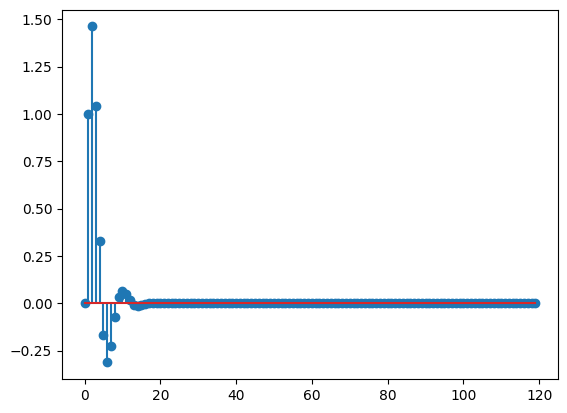

p: [0.48083261 0.48083261], [ 0.48083261 -0.48083261]
z: [-0.25 -0.25], [ 0.19364917 -0.19364917]


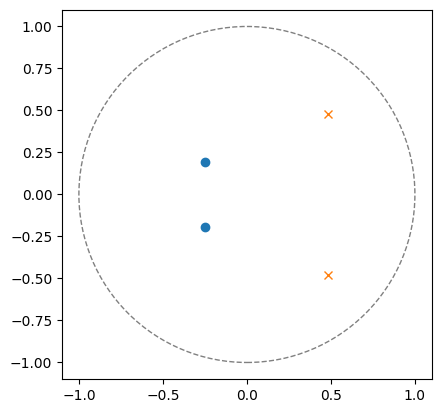

In [ ]:
# pole in Q1 (re>0, im>0, |p| < 1 for stability)

# e^(j*n*omega)

r = 0.68
theta = np.pi/4

p1 = p_eq(r=r,theta=theta)
print(f"p: {p1}")

a1 = np.poly([p1, np.conj(p1)])
h1 = lfilter(b, a1, impulse)

plt.stem(h1)
plt.show()

zplane_plot(b,a1)

## TWO conjugate poles, one in quadrant II and the conjugate in quadrant III

$ p2 = 0.72 * e^{1j * 2.7 * \pi/4} $

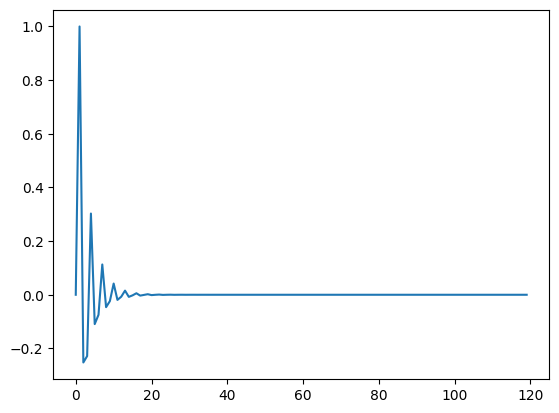

p: [-0.37619897 -0.37619897], [ 0.61390092 -0.61390092]
z: [-0.25 -0.25], [ 0.19364917 -0.19364917]


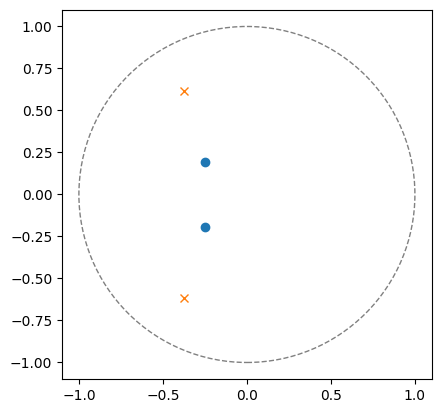

In [ ]:
# e^(j*n*omega)

r = 0.72
theta = 2.7*np.pi/4

p2 = p_eq(r=r,theta=theta)
a2 = np.poly([p2, np.conj(p2)])
h2 = lfilter(b, a2, impulse)

plt.plot(h2)
plt.show()

zplane_plot(b,a2)

## ONE pole in quadrant I

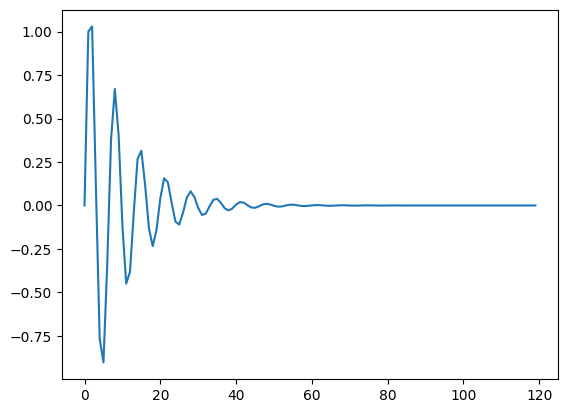

p: [0.52900673], [0.72811529]
z: [-0.25 -0.25], [ 0.19364917 -0.19364917]


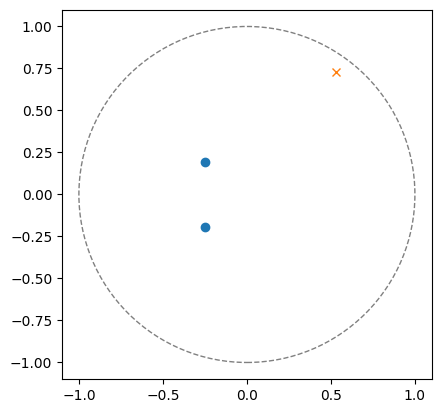

In [ ]:
# e^(j*n*omega)

r = 0.9
theta = 1.2 * np.pi/4

p3 = p_eq(r=r,theta=theta)
# poles3 = [p3, np.conj(p3)]

# a3 = np.poly([np.conj(p3)])
a3 = np.poly([p3])
h3 = lfilter(b, a3, impulse)

plt.plot(h3)
plt.show()

zplane_plot(b,a3)

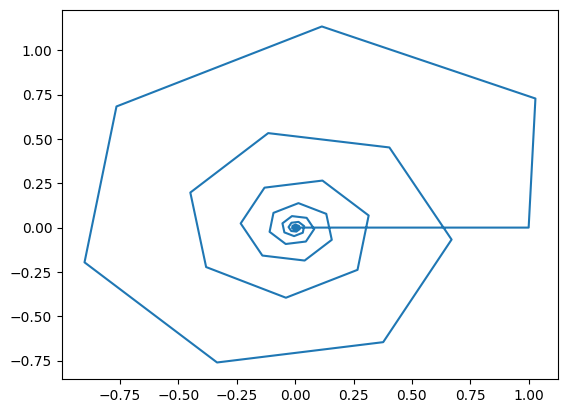

In [ ]:
plt.plot(h3.real, h3.imag)
plt.show()

## TWO conjugate poles outside of the unit circle

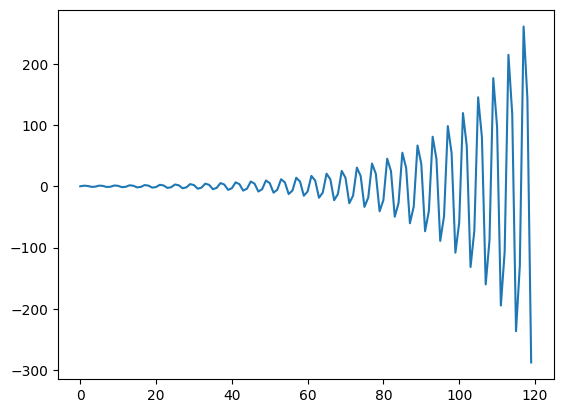

p: [6.4293957e-17 6.4293957e-17], [ 1.05 -1.05]
z: [-0.25 -0.25], [ 0.19364917 -0.19364917]


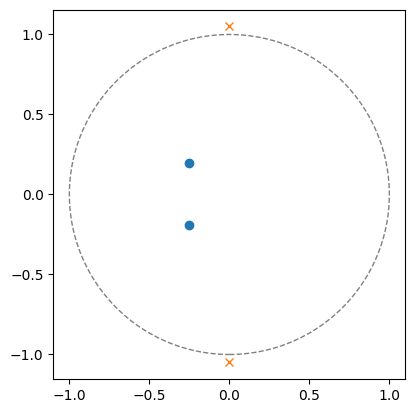

In [ ]:
# e^(j*n*omega)

r = 1.05
theta = np.pi/2

# p4 = 1.92 * np.exp(1.5j * np.pi/2)
# p4 = 1.05 * np.exp(1.9j * np.pi / 4)
p4 = p_eq(r=r,theta=theta)

a4 = np.poly([p4, np.conj(p4)])
h4 = lfilter(b, a4, impulse)

plt.plot(h4)
plt.show()

zplane_plot(b,a4)